In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

In [3]:
plate_apps = pd.read_csv("datasets/clean/plate_apps.csv")

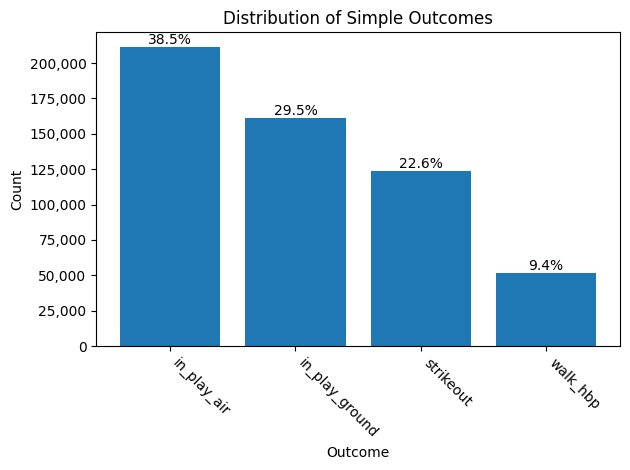

In [8]:
model_data = plate_apps.loc[pd.to_datetime(plate_apps["date"]).dt.year >= 2022]

keys, counts = np.unique(model_data["simple_outcome"].values, return_counts=True)
sorted_indices = np.argsort(counts)[::-1]
keys = keys[sorted_indices]
counts = counts[sorted_indices]

# Calculate percentages
total = counts.sum()
percentages = counts / total * 100

fig, ax = plt.subplots()
bars = ax.bar(keys, counts)

# Label bars with percentages
ax.bar_label(bars, labels=[f"{p:.1f}%" for p in percentages])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=-45, ha='left')
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Simple Outcomes")
plt.tight_layout()
plt.savefig("figures/distribution_of_simple_outcomes.png")
plt.show()

In [ ]:
keys, counts = np.unique(model_data["outcome"].astype(str), return_counts=True)
sorted_indices = np.argsort(counts)[::-1]
keys = keys[sorted_indices]
counts = counts[sorted_indices]

fig, ax = plt.subplots()
bars = ax.bar(keys, counts)

# Format labels with commas
ax.bar_label(bars, labels=[f"{c:,}" for c in counts])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=-45, ha='left')
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Plate Appearance Outcomes")
plt.savefig("figures/distribution_of_outcomes.png")
plt.show()

In [ ]:
# Find the date of the first matchup of every pitcher and batter in the dataset
first_matchup_date = plate_apps.groupby(["pitcher", "batter"]).agg(
    first_matchup_date=('date', 'min')
).reset_index()

# Merge this date back to the original dataset 
plate_apps_matchup_date = plate_apps.merge(first_matchup_date, on=['pitcher', 'batter'])

# Keep only the rows from the first matchup date
first_matchup_rows = plate_apps_matchup_date[(plate_apps_matchup_date['date'] == plate_apps_matchup_date['first_matchup_date'])]

# Only include the first matchup from that date
# Select the earliest inning 
first_matchup = (
    first_matchup_rows
    .sort_values(['pitcher', 'batter', 'inning'])  
    .groupby(['pitcher', 'batter'], as_index=False)
    .first()  
)

# Save the first matchups from 2024 to be used in testing 
test_set_24 = first_matchup.loc[pd.to_datetime(first_matchup["date"]).dt.year == 2024]
test_set_24.to_csv("datasets/clean/test_plate_apps.csv")